In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
data=pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


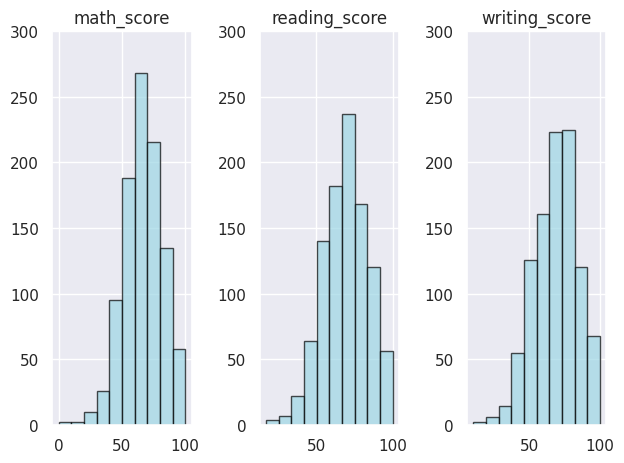

In [2]:
plt.subplot(131)
plt.ylim(0, 300)

plt.title('math_score')
plt1=plt.hist(data['math_score'],alpha=0.7,bins=10,edgecolor='black',color='#9dd7e5')

plt.subplot(132)
plt.ylim(0, 300)
plt.title('reading_score')
plt2=plt.hist(data['reading_score'],alpha=0.7,bins=10,edgecolor='black',color='#9dd7e5')

plt.subplot(133)
plt.title('writing_score')
plt3=plt.hist(data['writing_score'],alpha=0.7,bins=10,edgecolor='black',color='#9dd7e5')
plt.ylim(0, 300)
plt.tight_layout()
plt.show()

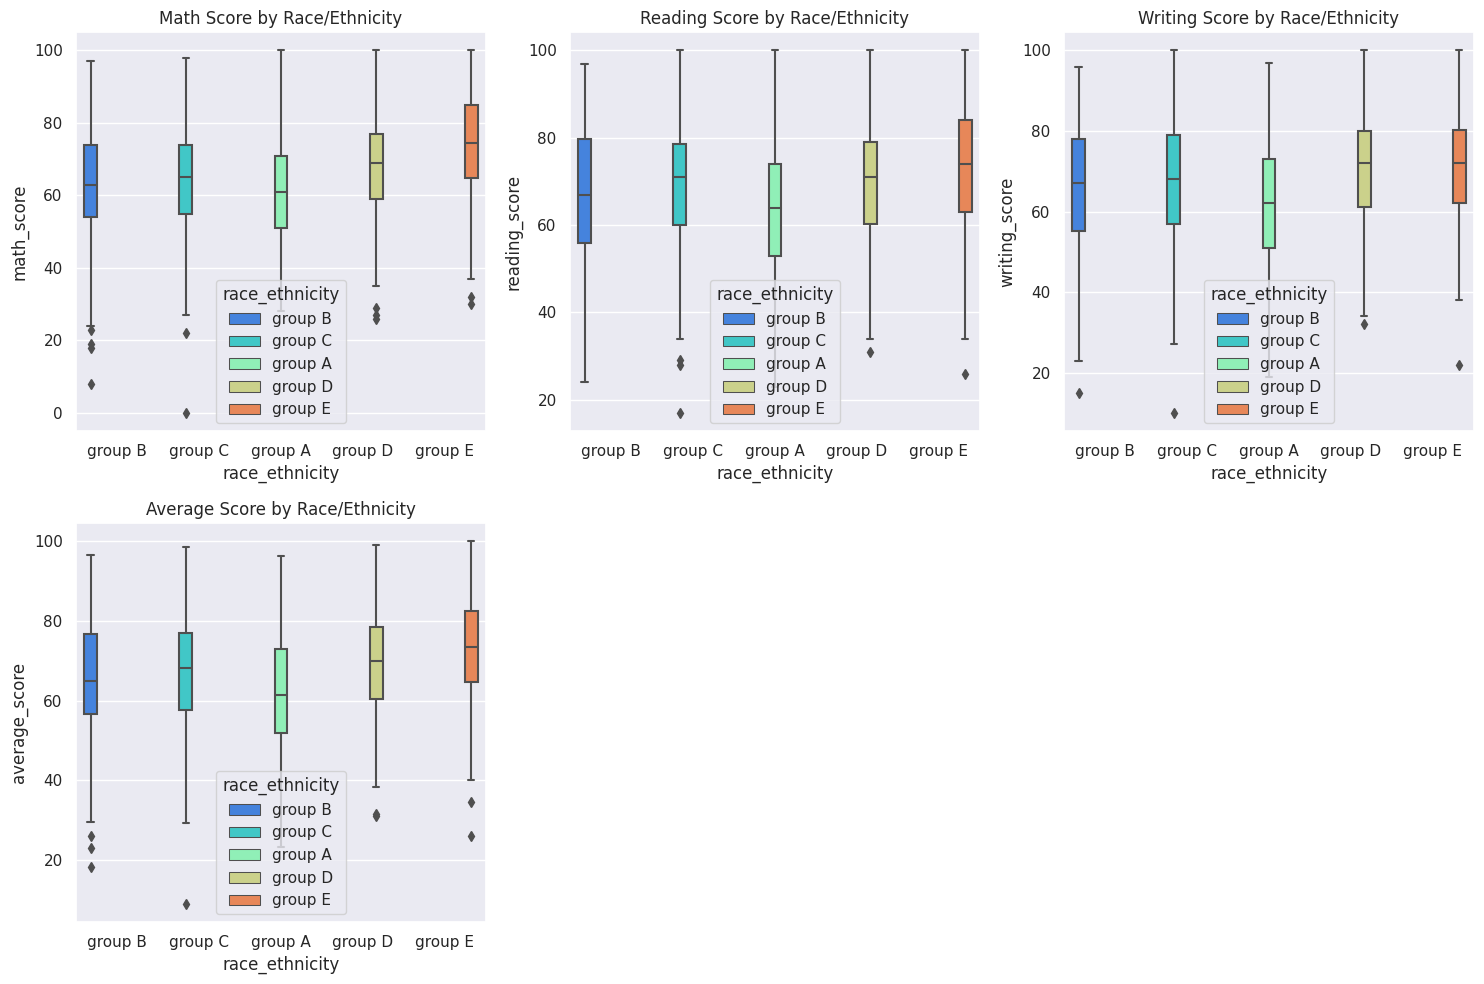

In [3]:

# Create subplots for each subject
plt.figure(figsize=(15, 10))

#Math Score by Race/Ethnicity
plt.subplot(231)
x=data['race_ethnicity']
sns.boxplot(x=x, y=data['math_score'], data=data, hue = x,palette='rainbow')
plt.title('Math Score by Race/Ethnicity')

# Reading Score by Race/Ethnicity
plt.subplot(232)

sns.boxplot(x=x, y=data['reading_score'], data=data,hue=x, palette='rainbow')
plt.title('Reading Score by Race/Ethnicity')

# Writing Score by Race/Ethnicity
plt.subplot(233)
sns.boxplot(x=x, y=data['writing_score'], data=data, hue=x,palette='rainbow')
plt.title('Writing Score by Race/Ethnicity')
plt.tight_layout()
# average Score by Race/Ethnicity
plt.subplot(234)
y=data[['math_score','reading_score','writing_score']].mean(axis=1)
sns.boxplot(x=x, y=y, data=data, hue=x,palette='rainbow').set(ylabel='average_score')
plt.title('Average Score by Race/Ethnicity')
plt.tight_layout()
plt.show()

# Comparing Mean of Average scores by different groups

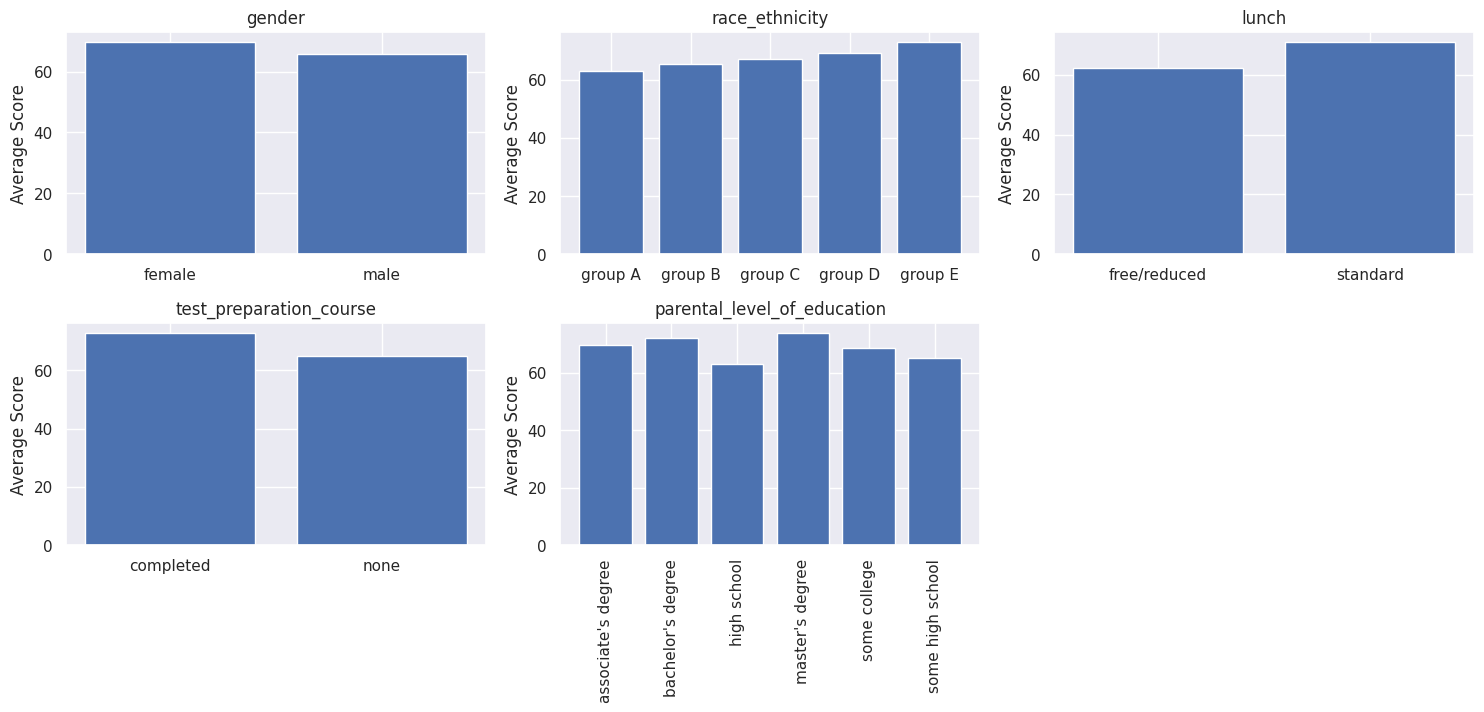

In [4]:
#Comparing Mean of Average_scores by different groups
data['average_score']=data[['math_score','reading_score','writing_score']].mean(axis=1)

#Calculating Mean by grouping
gender = data.groupby('gender').average_score.mean()
race = data.groupby('race_ethnicity').average_score.mean()
parent_education = data.groupby('parental_level_of_education').average_score.mean()
lunch= data.groupby('lunch').average_score.mean()
prepared = data.groupby('test_preparation_course').average_score.mean()

groups=[gender,race,lunch,prepared,parent_education]

#Ploting the Means of different groups
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
axs[1][2].set_visible(False)

for i in range(0,5):
  

    
    axs.flat[i].bar(groups[i].index,groups[i].values)
    plt.tight_layout()
    axs.flat[i].set_title(groups[i].index.name)
    axs.flat[i].set_ylabel('Average Score')
    
    #To correct for the longer degree names
    if groups[i].index.name == 'parental_level_of_education':
        axs.flat[i].tick_params(axis='x', rotation=90)
    

# **Analysis on if preparation,gender, race/ethinicity, parental education has a statistical impact on scores**

**Testing significance of preparation with T_Test**

In [5]:
from statsmodels.stats.weightstats import ttest_ind
#Dividing the data into 2 groups
preparedgroup = data.groupby('test_preparation_course')['average_score']
prepared=preparedgroup.get_group('completed')
unprepared=preparedgroup.get_group('none')
t_statistic, p_value, dof = ttest_ind(prepared,unprepared)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in scores between the groups is statistically significant.Preparation helped the students perform better.")
else:
    print("There is no statistically significant difference in scores between the groups.Preparation was not needed for the test")

T-Statistic: 8.39094444348259
P-Value: 1.6337802035923625e-16
The difference in scores between the groups is statistically significant.Preparation helped the students perform better.


**Checking if gender has a significant impact on average_score with T_test**

In [6]:
from statsmodels.stats.weightstats import ttest_ind

#Dividing the data into 2 groups
gender_group = data.groupby('gender')['average_score']
male=gender_group.get_group('male')
female=gender_group.get_group('female')
t_statistic, p_value, dof = ttest_ind(male,female)

#Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

#Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in scores between the groups is statistically significant.")
    if male.mean()>female.mean():
        print('Males performed better')
    else:
        print("Females performed better")
else:
    print("There is no statistically significant difference in scores between the groups.")

T-Statistic: -4.169913529142016
P-Value: 3.311973638243428e-05
The difference in scores between the groups is statistically significant.
Females performed better


**Checking if ethinicity/race has significant impact on average_score with ANOVA framework**

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data_raw' is your DataFrame containing the required columns

# Fit the ANOVA model
model = ols('average_score ~ C(race_ethnicity)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Interpret the results
alpha = 0.05  # Significance level
p_value = anova_table.iloc[0,3]  # Extract p-value for race/ethnicity
print(p_value)

if p_value < alpha:
    print("There is a significant difference in average scores between the race/ethnicity groups.")
else:
    print("There is no significant difference in average scores between the race/ethnicity groups.")


                          sum_sq     df         F        PR(>F)
C(race_ethnicity)    7163.645895    4.0  9.096052  3.225869e-07
Residual           195904.426994  995.0       NaN           NaN
3.2258693161040875e-07
There is a significant difference in average scores between the race/ethnicity groups.


**Checking if Parental Education has a statistical impact on average_score with ANOVA framework**

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data_raw' is your DataFrame containing the required columns

# Fit the ANOVA model
model = ols('average_score ~ C(parental_level_of_education)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Interpret the results
alpha = 0.05  # Significance level
p_value = anova_table.iloc[0,3]  # Extract p-value for race/ethnicity
print(p_value)

if p_value < alpha:
    print("There is a significant difference in average scores based on parental_education.")
else:
    print("There is no significant difference in average scores based on parental_educaton.")


                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)   10420.367638    5.0  10.753147  4.381046e-10
Residual                        192647.705250  994.0        NaN           NaN
4.3810464809453456e-10
There is a significant difference in average scores based on parental_education.
